# Area Plots, Histograms, and Bar Plots

In [1]:
import matplotlib as npl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
! pip install xlrd

In [3]:
df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
print(df_can.shape)

(195, 43)


In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [7]:
all(isinstance(column, str) for column in df_can.columns)

False

In [8]:
df_can.columns = list(map(str, df_can.columns))

In [9]:
all(isinstance(column, str) for column in df_can.columns)

True

In [10]:
df_can.set_index('Country', inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [11]:
df_can['Total'] = df_can.sum(axis = 1)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [12]:
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [13]:
# finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data
years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Visualizing Data using Matplotlib<a id="4"></a>

In [14]:
mpl.style.use('ggplot') # optional

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) 

NameError: name 'mpl' is not defined

In [ ]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

df_top5.head()

In [ ]:
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind = 'area',
            stacked = False,
            figsize = (20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [ ]:
df_top5.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [ ]:

df_least5 = df_can.tail(5)


df_least5 = df_least5[years].transpose() 
df_least5.head()

df_least5.index = df_least5.index.map(int)
df_least5.plot(kind='area', alpha=0.45, figsize=(20, 10)) 

plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')


# Histograms<a id="8"></a>

In [ ]:
# let's quickly view the 2013 data
df_can['2013'].head()

In [ ]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

In [ ]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

In [ ]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

In [ ]:
# let's quickly view the dataset 
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

In [ ]:
# generate histogram
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

In [ ]:
# transpose dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

In [ ]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [ ]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [ ]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

In [ ]:
# create a dataframe of the countries of interest (cof)
df_cof = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]
# transpose the dataframe
df_cof = df_cof.transpose() 


# let's get the x-tick values
count, bin_edges = np.histogram(df_cof, 15)


# Un-stacked Histogram
df_cof.plot(kind ='hist',
            figsize=(10, 6),
            bins=15,
            alpha=0.35,
            xticks=bin_edges,
            color=['coral', 'darkslateblue', 'mediumseagreen']
            )


plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')



plt.show()

# Bar Charts (Dataframe) <a id="10"></a>

A bar plot is a way of representing data where the *length* of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals. 

To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:

* `kind=bar` creates a *vertical* bar plot
* `kind=barh` creates a *horizontal* bar plot

In [16]:
# get a data -step 1
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

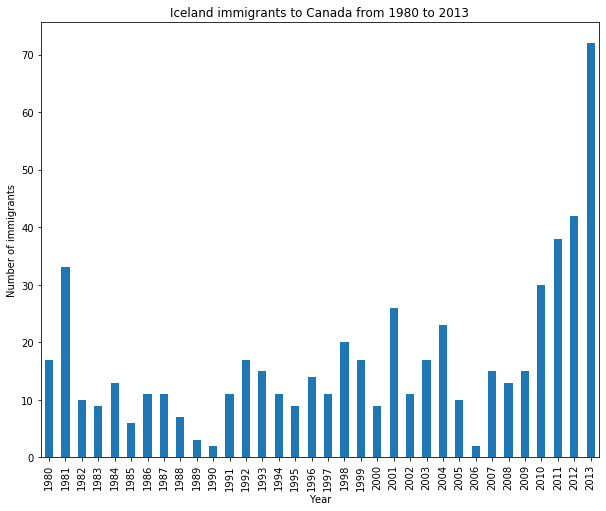

In [17]:
# plot data -step 2
df_iceland.plot(kind = 'bar', figsize = (10, 8))

plt.title('Iceland immigrants to Canada from 1980 to 2013')
plt.ylabel('Number of immigrants')
plt.xlabel('Year')

plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008. 

Let's annotate this on the plot using the `annotate` method of the **scripting layer** or the **pyplot interface**. We will pass in the following parameters:
- `s`: str, the text of annotation.
- `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
- `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
- `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
- `arrowprops`: Takes a dictionary of properties to draw the arrow:
    - `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    - `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    - `color`: Specifes color of arror.
    - `lw`: Specifies the line width.

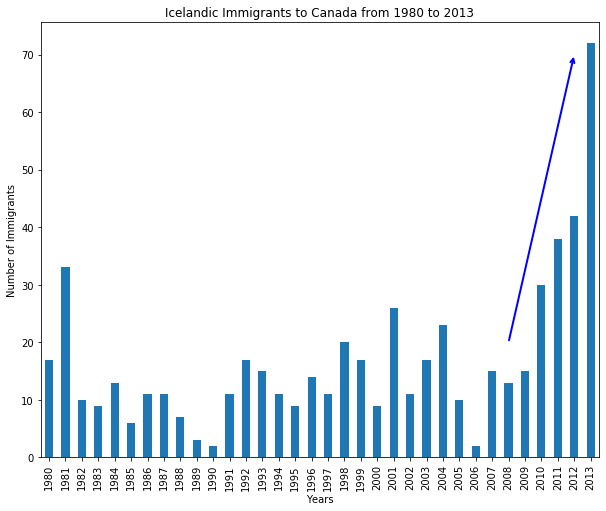

In [18]:
df_iceland.plot(kind = 'bar', figsize = (10, 8), rot=90)# rotate the bars by 90 degrees

plt.title('Icelandic Immigrants to Canada from 1980 to 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')


#Annotate arrow
plt.annotate('',
             xy = (32,70),
             xytext = (28, 20),
             xycoords = 'data',
             arrowprops = dict(arrowstyle = '->', connectionstyle= 'arc3', color= 'blue', lw= 2)
            )
plt.show()

Let's also annotate a text to go over the arrow.  We will pass in the following additional parameters:
- `rotation`: rotation angle of text in degrees (counter clockwise)
- `va`: vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
- `ha`: horizontal alignment of text [‘center’ | ‘right’ | ‘left’]

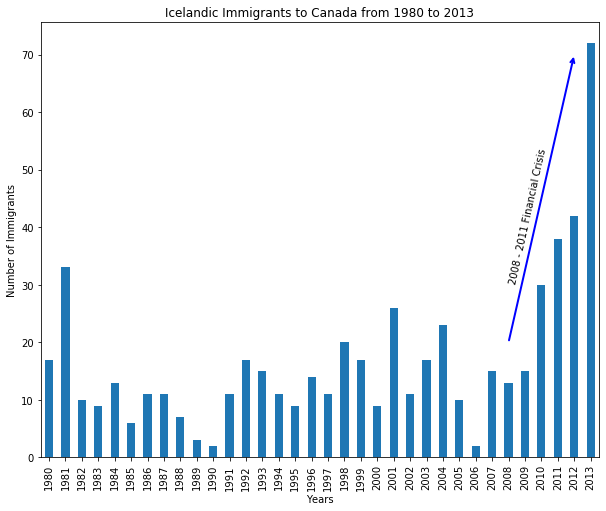

In [19]:
df_iceland.plot(kind = 'bar', figsize = (10, 8), rot=90)# rotate the bars by 90 degrees

plt.title('Icelandic Immigrants to Canada from 1980 to 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')


#Annotate arrow
plt.annotate('',
             xy = (32,70),
             xytext = (28, 20),
             xycoords = 'data',
             arrowprops = dict(arrowstyle = '->', connectionstyle= 'arc3', color= 'blue', lw= 2)
            )
# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', 
             xy=(28, 30),                    
             rotation=77.5,                 
             va='bottom',                   
             ha='left',                 
            )

plt.show()

for Get the data pertaining to the top 15 countries..

In [20]:
### type your answer here
df_can.sort_values(by = 'Total', ascending = True, inplace = True)

# get top 15 countries
df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

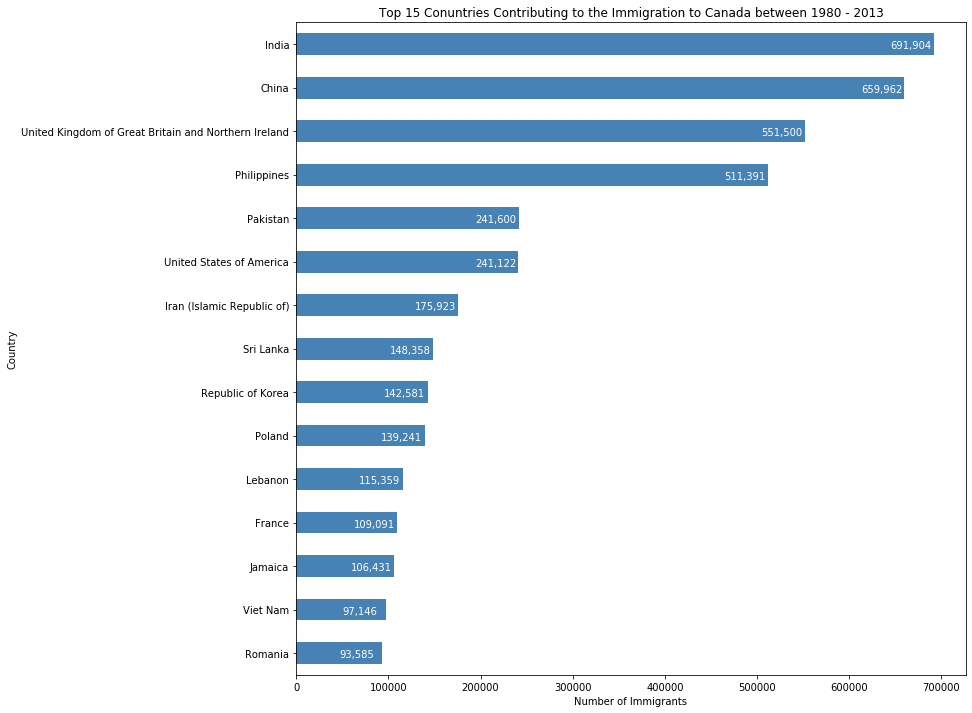

In [21]:
 # generate plot
    
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country

for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')